# vehicle insurance claim - fraud detection

### import important libraries

In [110]:
import numpy as np
import pandas as pd

In [111]:
data = pd.read_csv("fraud_oracle.csv")

In [112]:
data.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


In [113]:
data.shape

(15420, 33)

In [114]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15420 non-null

In [115]:
data.describe()

,WeekOfMonth,WeekOfMonthClaimed,Age,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Year
count,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000
mean,2.788586,2.693969,39.855707,0.059857,7710.500000,8.483268,407.704280,2.487808,1994.866472
std,1.287585,1.259115,13.492377,0.237230,4451.514911,4.599948,43.950998,1.119453,0.803313
min,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,300.000000,1.000000,1994.000000
25%,2.000000,2.000000,31.000000,0.000000,3855.750000,5.000000,400.000000,1.000000,1994.000000
50%,3.000000,3.000000,38.000000,0.000000,7710.500000,8.000000,400.000000,2.000000,1995.000000
75%,4.000000,4.000000,48.000000,0.000000,11565.250000,12.000000,400.000000,3.000000,1996.000000
max,5.000000,5.000000,80.000000,1.000000,15420.000000,16.000000,700.000000,4.000000,1996.000000


In [116]:
data.isnull().sum()

Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
FraudFound_P            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            0
Days_Policy_Accident    0
Days_Policy_Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange_Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
dtype: int64

In [117]:
data.dtypes

Month                   object
WeekOfMonth              int64
DayOfWeek               object
Make                    object
AccidentArea            object
DayOfWeekClaimed        object
MonthClaimed            object
WeekOfMonthClaimed       int64
Sex                     object
MaritalStatus           object
Age                      int64
Fault                   object
PolicyType              object
VehicleCategory         object
VehiclePrice            object
FraudFound_P             int64
PolicyNumber             int64
RepNumber                int64
Deductible               int64
DriverRating             int64
Days_Policy_Accident    object
Days_Policy_Claim       object
PastNumberOfClaims      object
AgeOfVehicle            object
AgeOfPolicyHolder       object
PoliceReportFiled       object
WitnessPresent          object
AgentType               object
NumberOfSuppliments     object
AddressChange_Claim     object
NumberOfCars            object
Year                     int64
BasePoli

In [118]:
categorical = data.columns[data.dtypes=='object']

In [119]:
categorical

Index(['Month', 'DayOfWeek', 'Make', 'AccidentArea', 'DayOfWeekClaimed',
       'MonthClaimed', 'Sex', 'MaritalStatus', 'Fault', 'PolicyType',
       'VehicleCategory', 'VehiclePrice', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars',
       'BasePolicy'],
      dtype='object')

In [120]:
data["FraudFound_P"].value_counts()

0    14497
1      923
Name: FraudFound_P, dtype: int64

In [121]:
numerical = data.columns[data.dtypes!='object']

In [122]:
numerical

Index(['WeekOfMonth', 'WeekOfMonthClaimed', 'Age', 'FraudFound_P',
       'PolicyNumber', 'RepNumber', 'Deductible', 'DriverRating', 'Year'],
      dtype='object')

### Exploratory Data Analysis

In [123]:
for c in categorical:
    print(c + ": ")
    print(data[c].value_counts())
    print()

Month: 
Jan    1411
May    1367
Mar    1360
Jun    1321
Oct    1305
Dec    1285
Apr    1280
Feb    1266
Jul    1257
Sep    1240
Nov    1201
Aug    1127
Name: Month, dtype: int64

DayOfWeek: 
Monday       2616
Friday       2445
Tuesday      2300
Thursday     2173
Wednesday    2159
Saturday     1982
Sunday       1745
Name: DayOfWeek, dtype: int64

Make: 
Pontiac      3837
Toyota       3121
Honda        2801
Mazda        2354
Chevrolet    1681
Accura        472
Ford          450
VW            283
Dodge         109
Saab          108
Mercury        83
Saturn         58
Nisson         30
BMW            15
Jaguar          6
Porche          5
Mecedes         4
Ferrari         2
Lexus           1
Name: Make, dtype: int64

AccidentArea: 
Urban    13822
Rural     1598
Name: AccidentArea, dtype: int64

DayOfWeekClaimed: 
Monday       3757
Tuesday      3375
Wednesday    2951
Thursday     2660
Friday       2497
Saturday      127
Sunday         52
0               1
Name: DayOfWeekClaimed, dtype: int6

In [124]:
import matplotlib.pyplot as plt
import seaborn as sns

Month: 


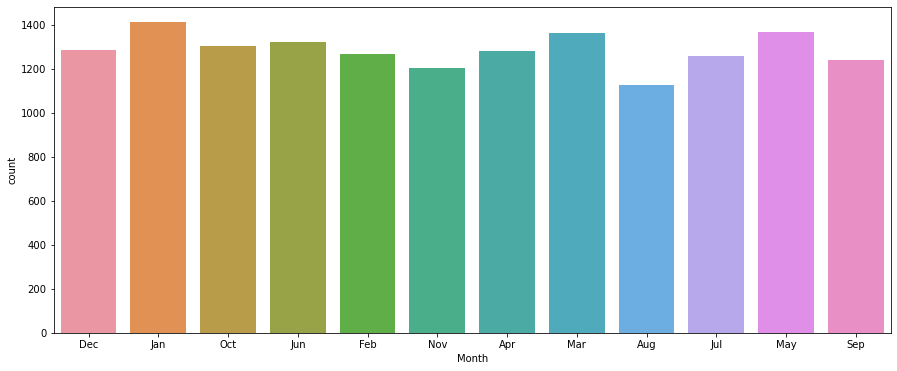

DayOfWeek: 


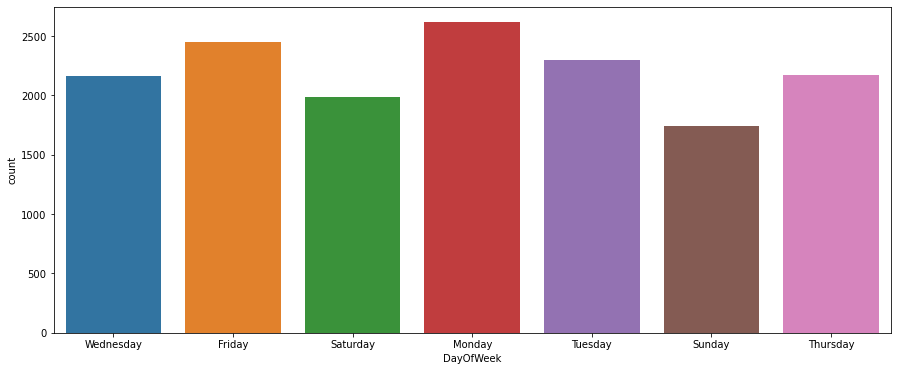

Make: 


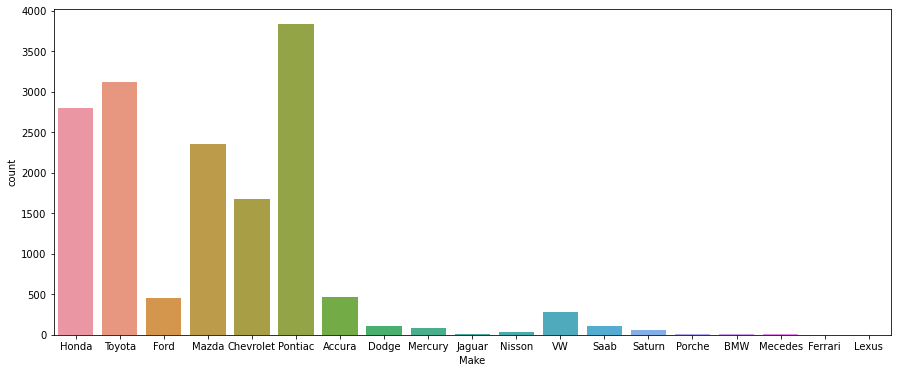

AccidentArea: 


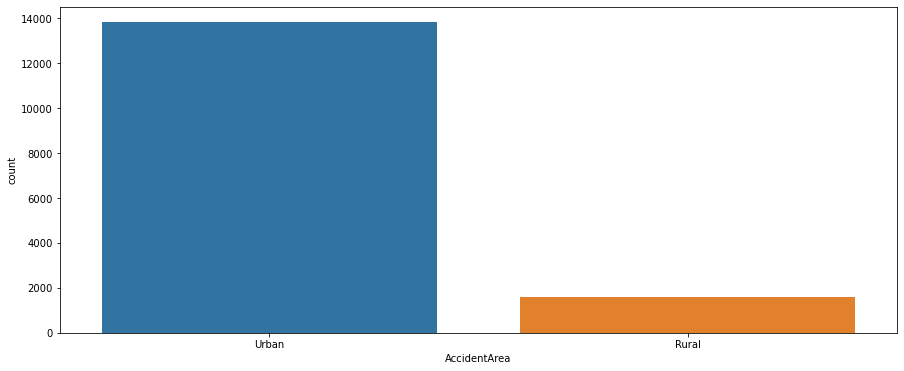

DayOfWeekClaimed: 


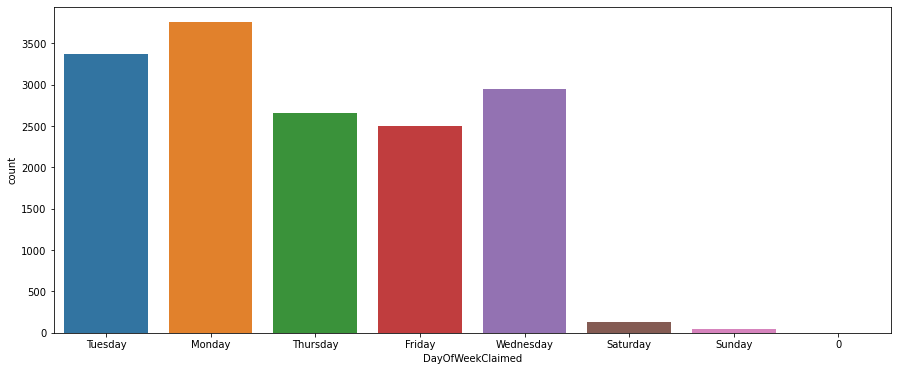

MonthClaimed: 


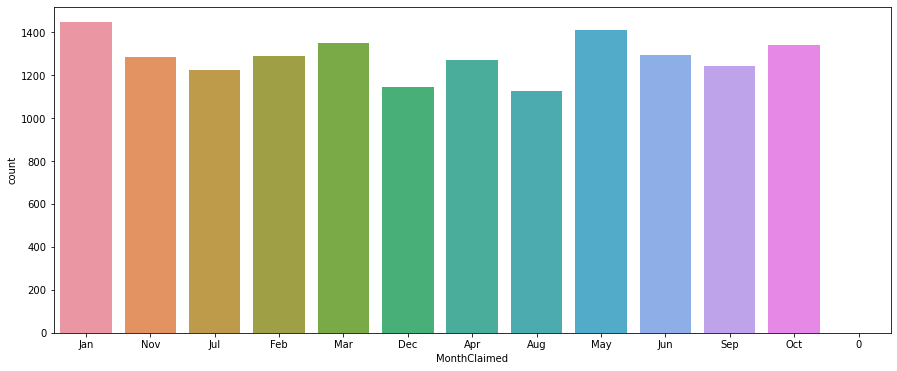

Sex: 


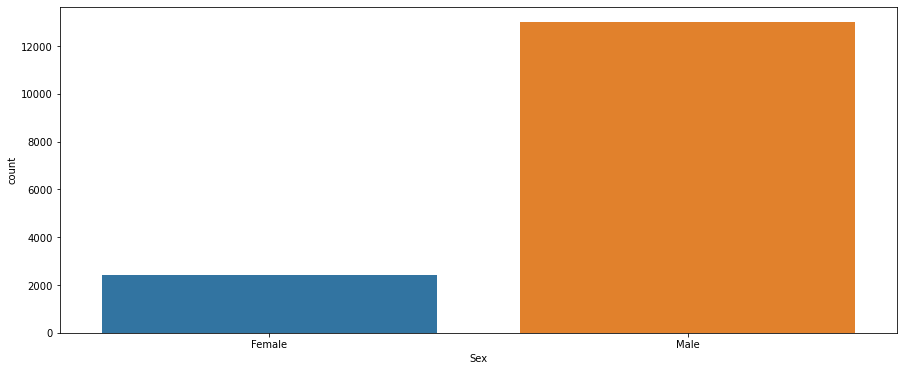

MaritalStatus: 


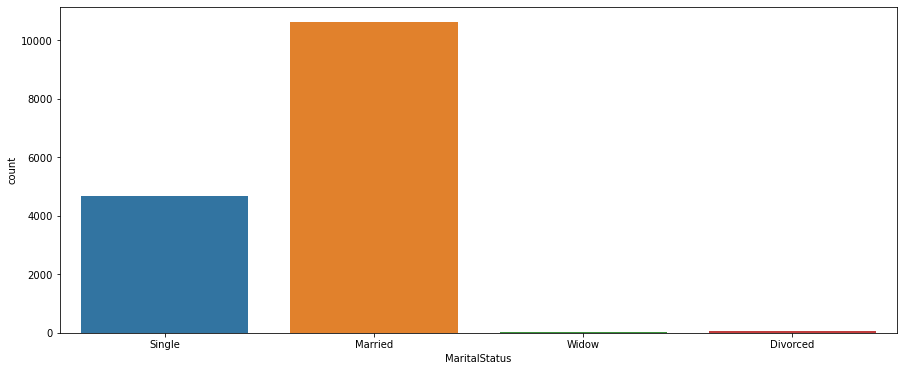

Fault: 


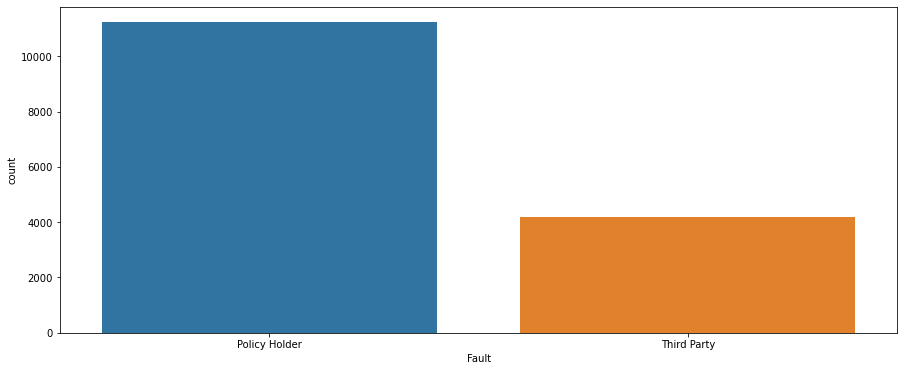

PolicyType: 


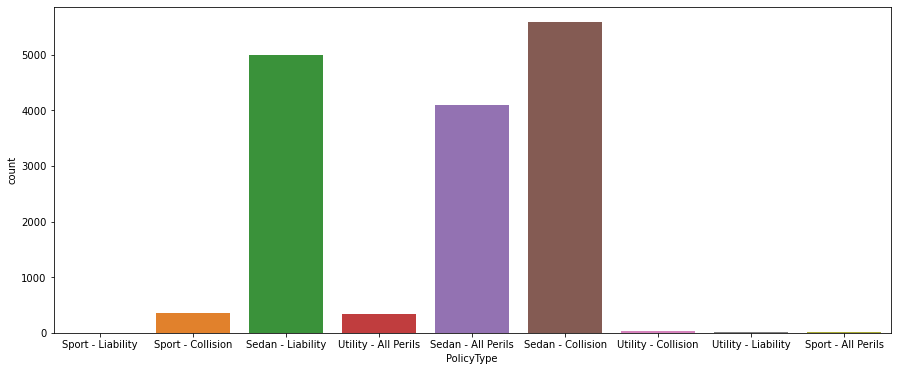

VehicleCategory: 


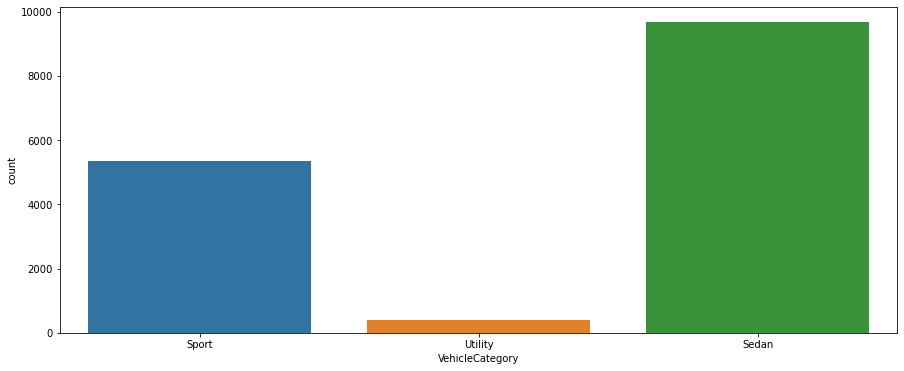

VehiclePrice: 


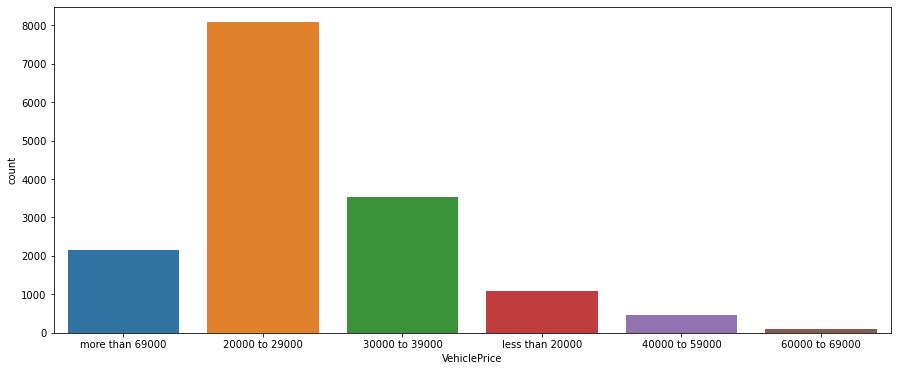

Days_Policy_Accident: 


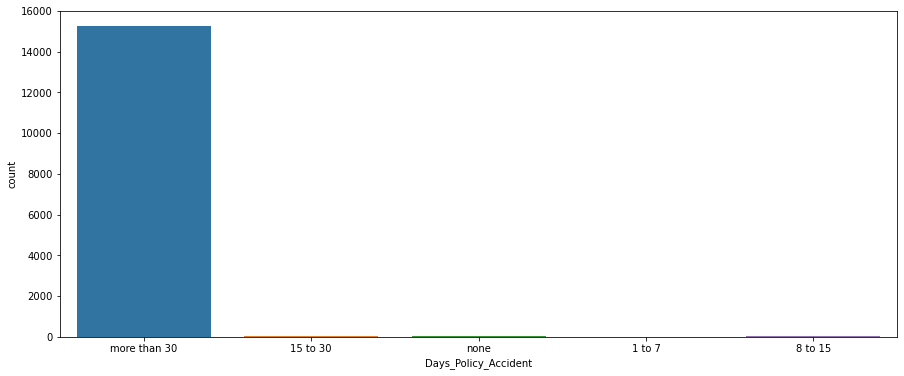

Days_Policy_Claim: 


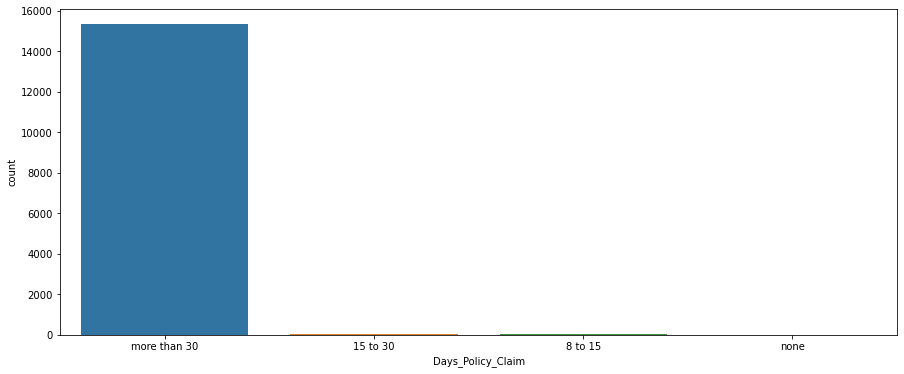

PastNumberOfClaims: 


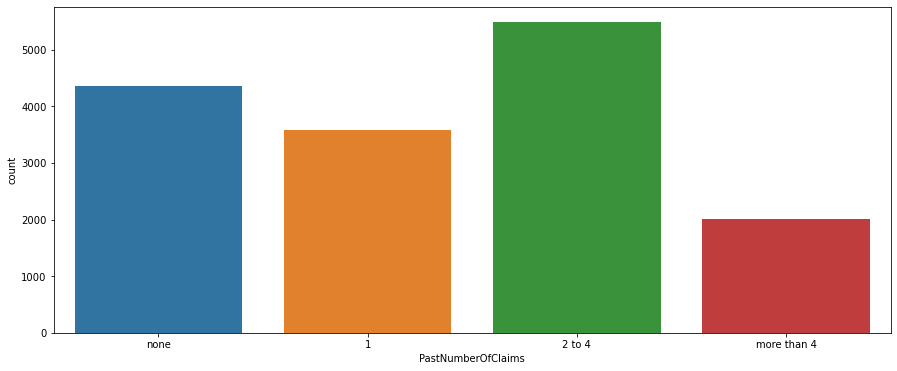

AgeOfVehicle: 


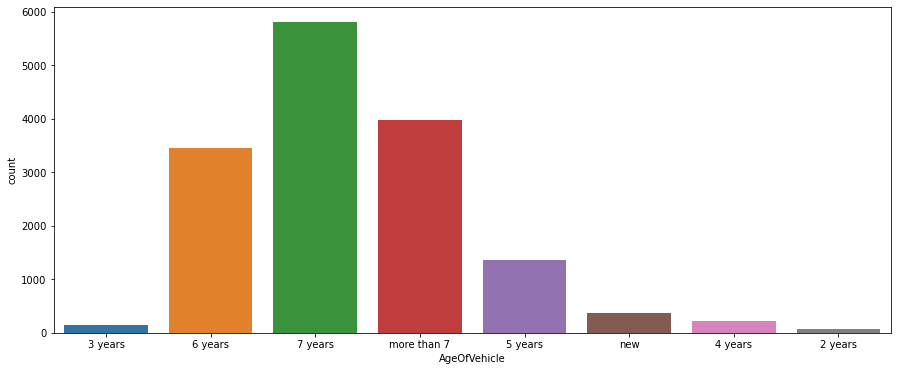

AgeOfPolicyHolder: 


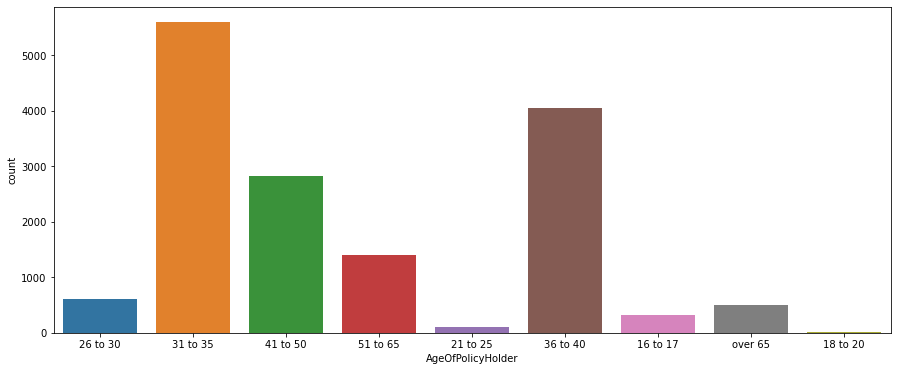

PoliceReportFiled: 


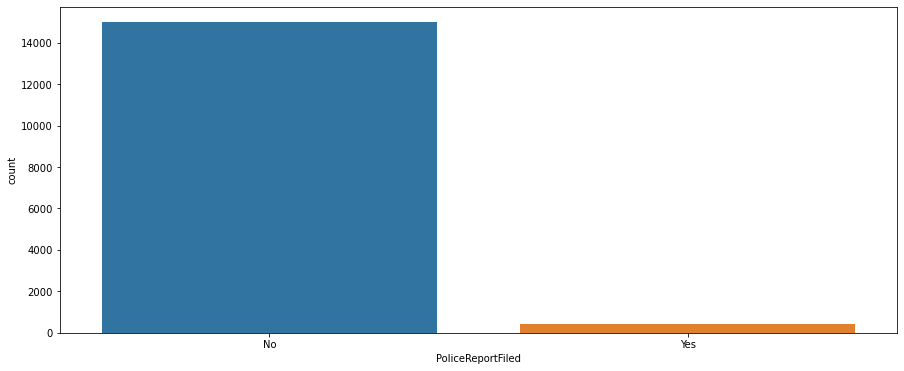

WitnessPresent: 


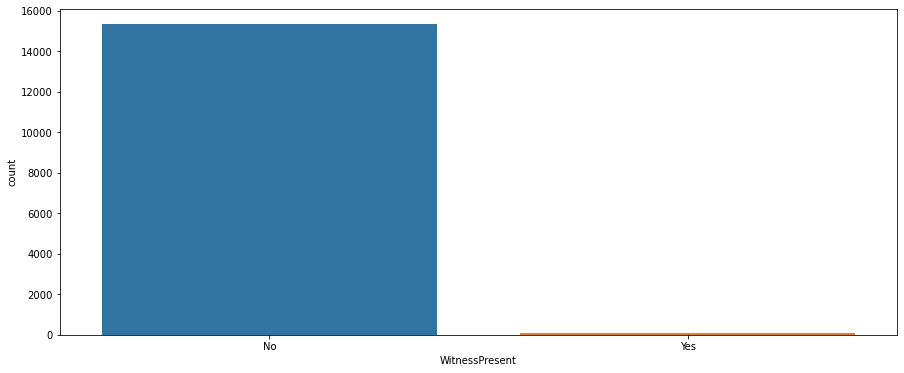

AgentType: 


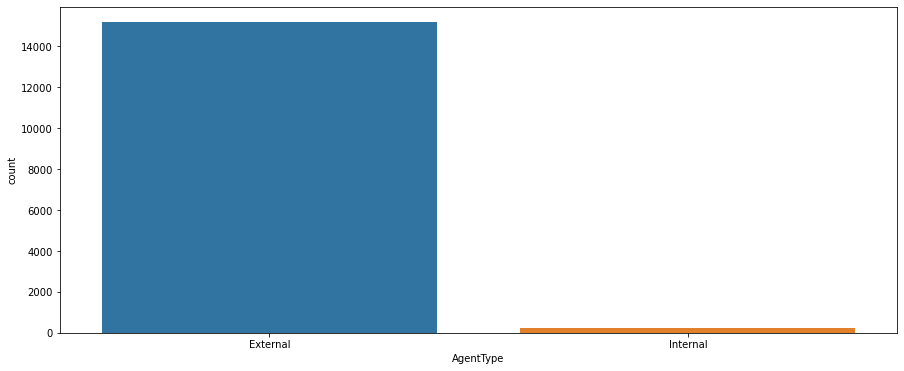

NumberOfSuppliments: 


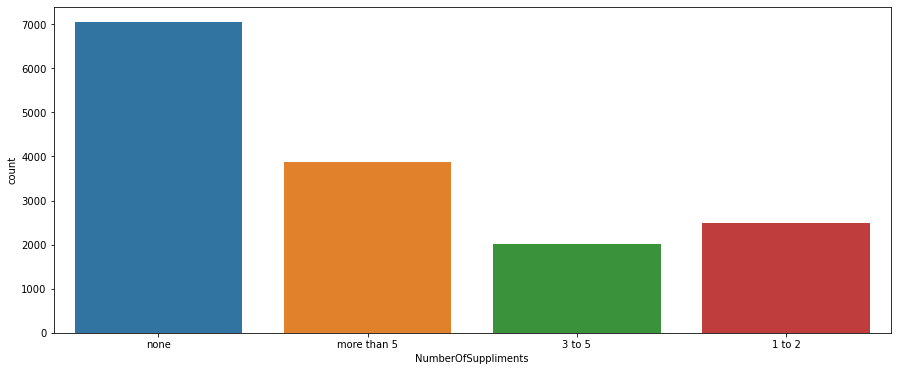

AddressChange_Claim: 


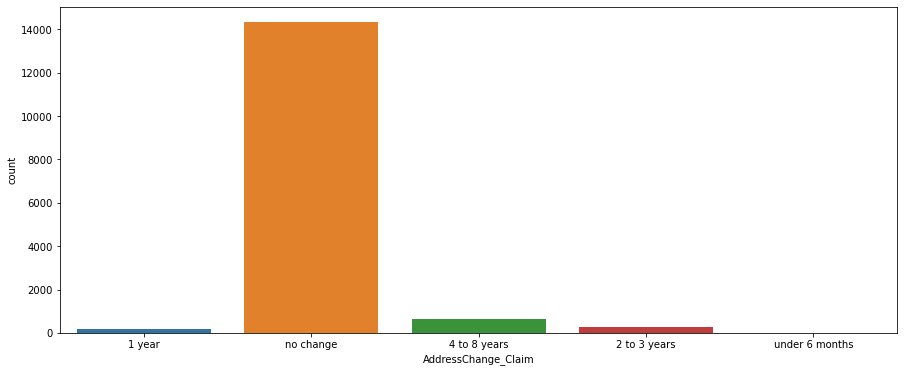

NumberOfCars: 


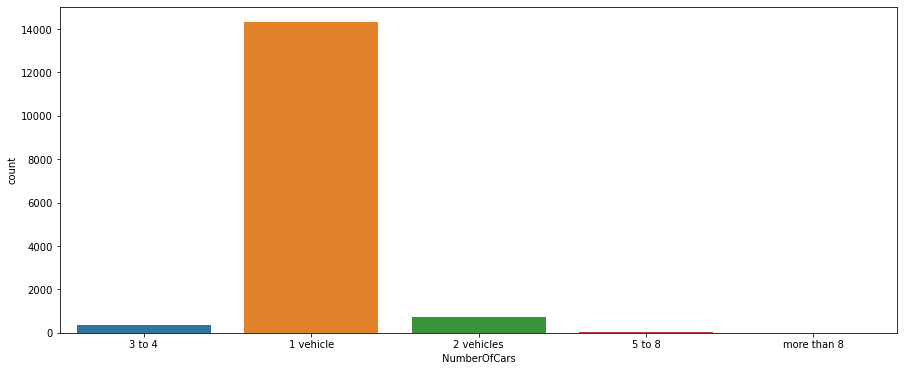

BasePolicy: 


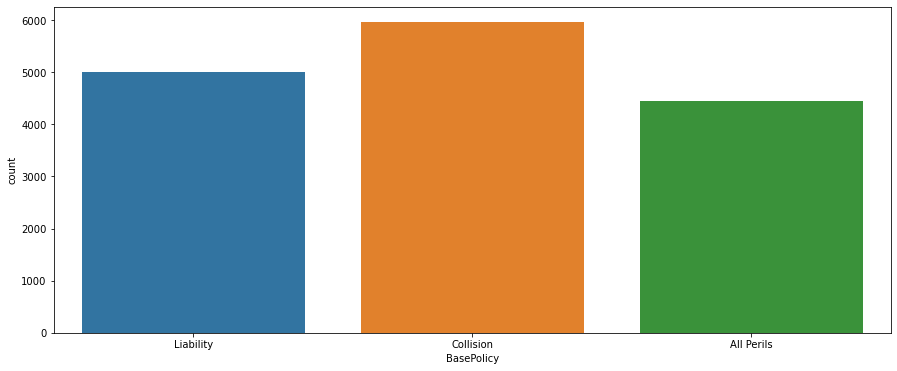

In [125]:
for c in categorical:
    plt.figure(figsize=(15,6))
    print(c + ": ")
    sns.countplot(x = c, data = data)
    plt.show()

In [126]:
for c in categorical:
    print(c + ": ")
    print(data[data.FraudFound_P == 1][c].value_counts())
    print()

Month: 
Mar    102
May     94
Jan     87
Aug     84
Feb     82
Jun     80
Apr     80
Sep     76
Oct     70
Dec     62
Jul     60
Nov     46
Name: Month, dtype: int64

DayOfWeek: 
Monday       160
Friday       154
Saturday     132
Sunday       122
Thursday     120
Tuesday      120
Wednesday    115
Name: DayOfWeek, dtype: int64

Make: 
Pontiac      213
Toyota       186
Honda        179
Mazda        123
Chevrolet     94
Accura        59
Ford          33
Saab          11
VW             8
Saturn         6
Mercury        6
Dodge          2
Nisson         1
Mecedes        1
BMW            1
Name: Make, dtype: int64

AccidentArea: 
Urban    790
Rural    133
Name: AccidentArea, dtype: int64

DayOfWeekClaimed: 
Monday       216
Tuesday      198
Wednesday    188
Friday       164
Thursday     144
Saturday      10
Sunday         3
Name: DayOfWeekClaimed, dtype: int64

MonthClaimed: 
May    102
Mar     97
Jan     92
Aug     92
Apr     82
Sep     78
Feb     78
Jun     78
Oct     73
Jul     56
Dec    

Month: 


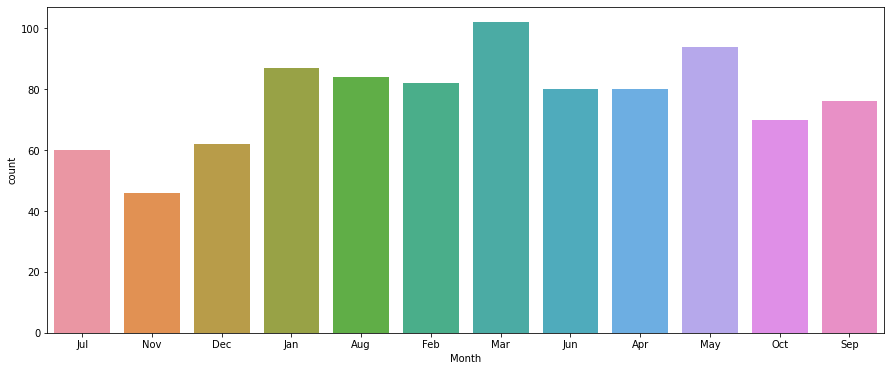

DayOfWeek: 


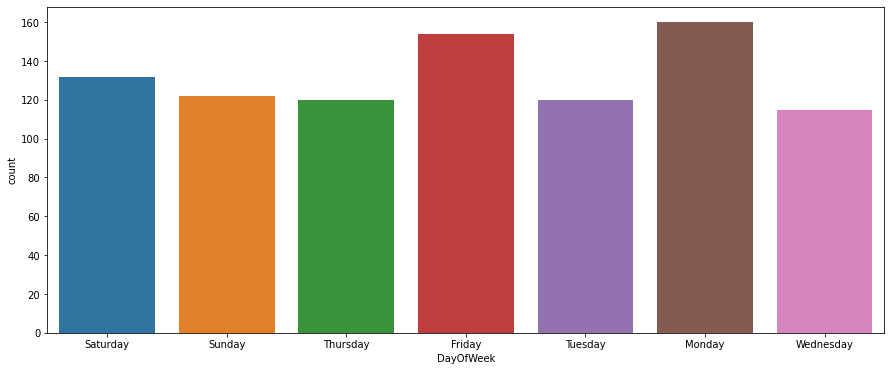

Make: 


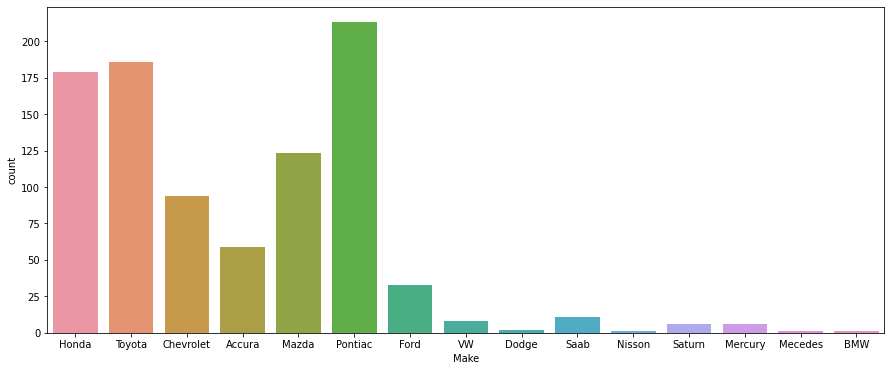

AccidentArea: 


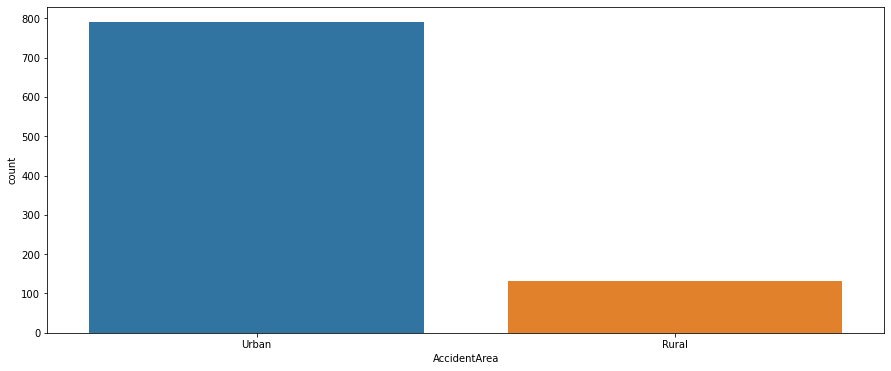

DayOfWeekClaimed: 


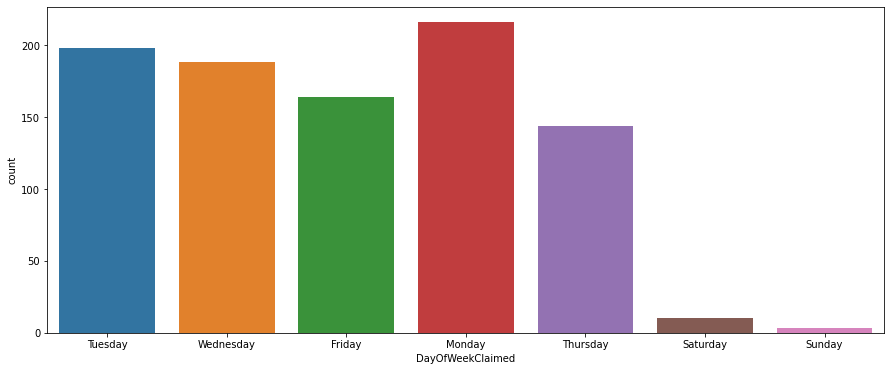

MonthClaimed: 


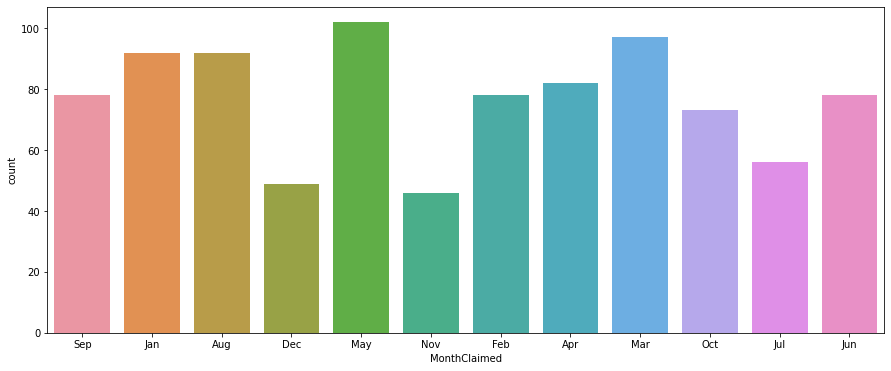

Sex: 


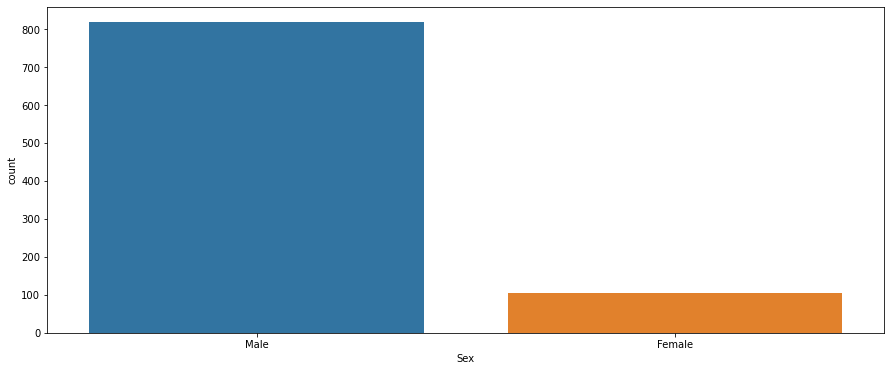

MaritalStatus: 


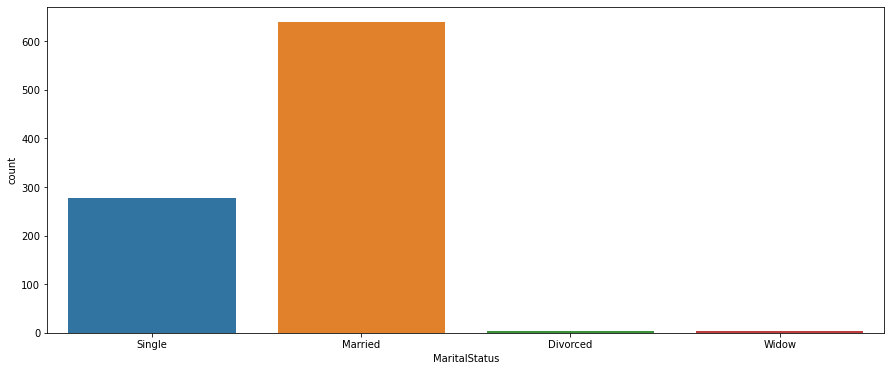

Fault: 


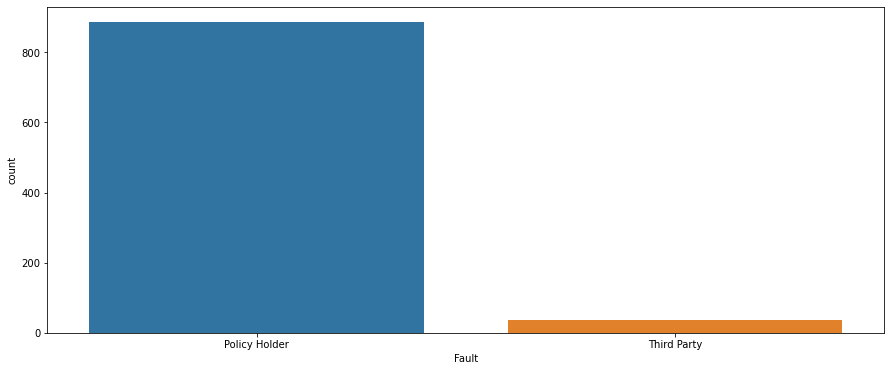

PolicyType: 


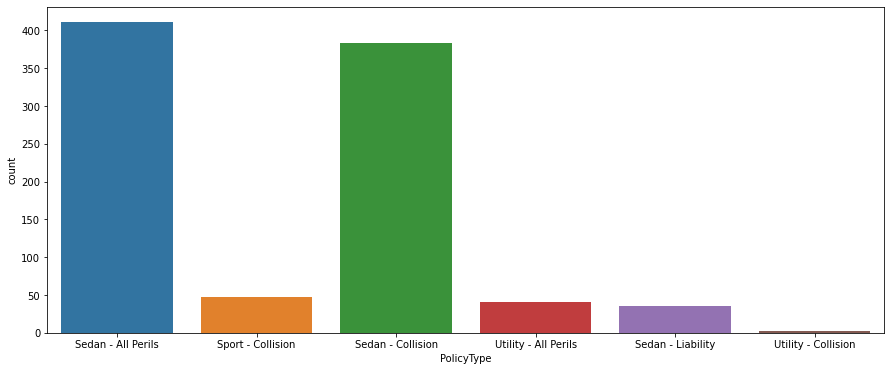

VehicleCategory: 


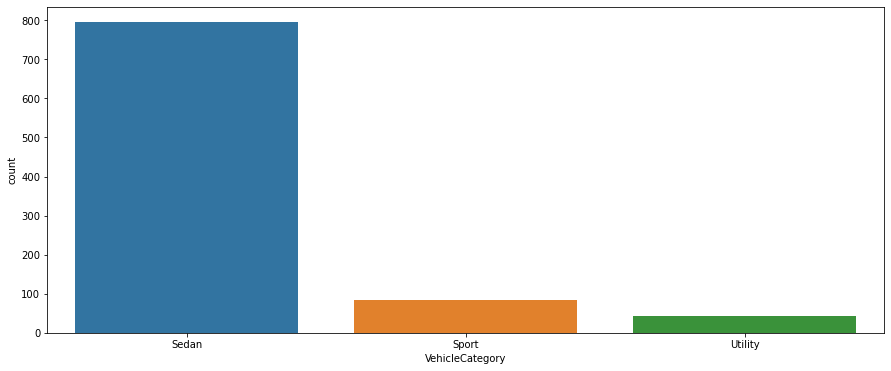

VehiclePrice: 


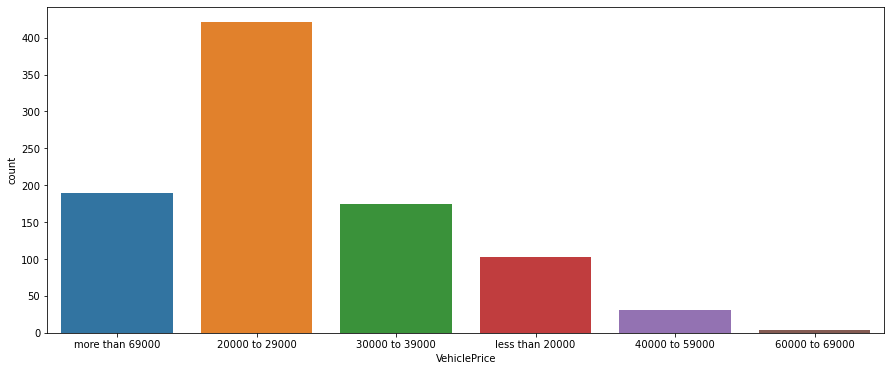

Days_Policy_Accident: 


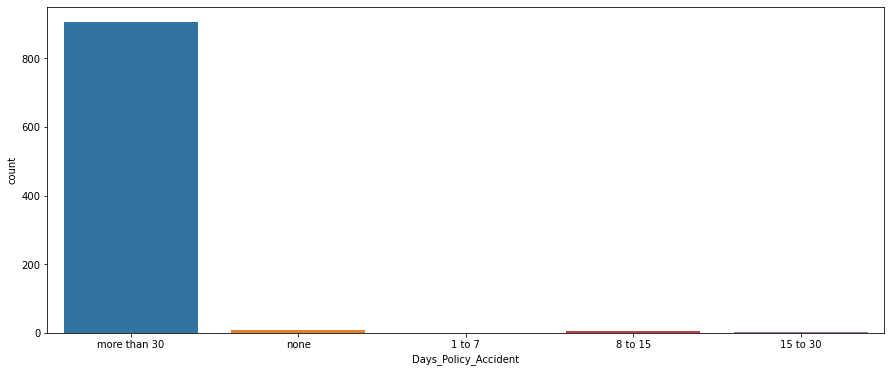

Days_Policy_Claim: 


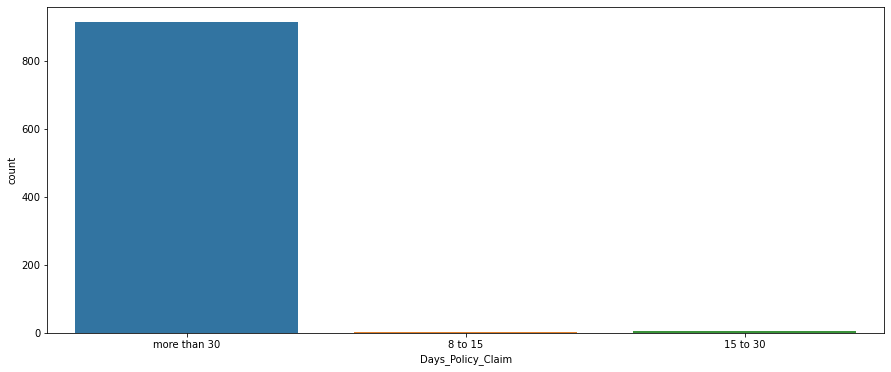

PastNumberOfClaims: 


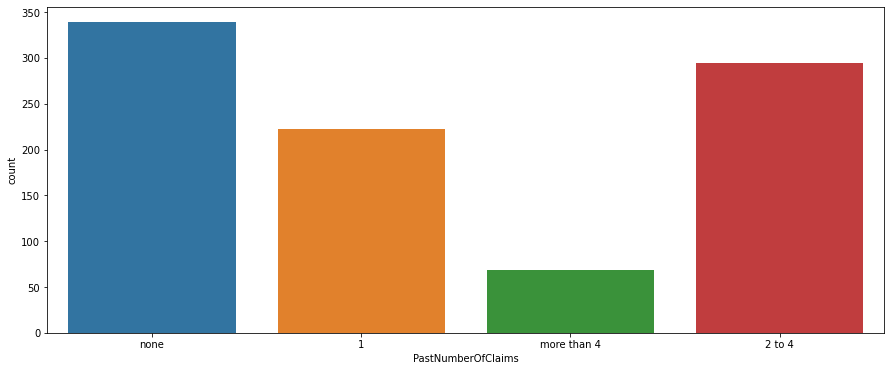

AgeOfVehicle: 


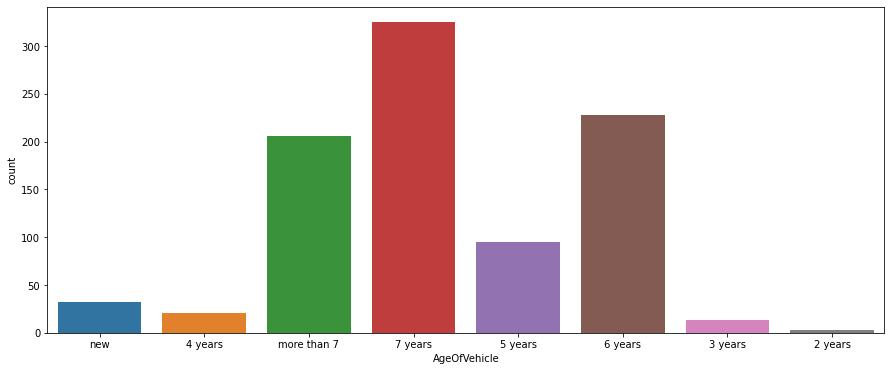

AgeOfPolicyHolder: 


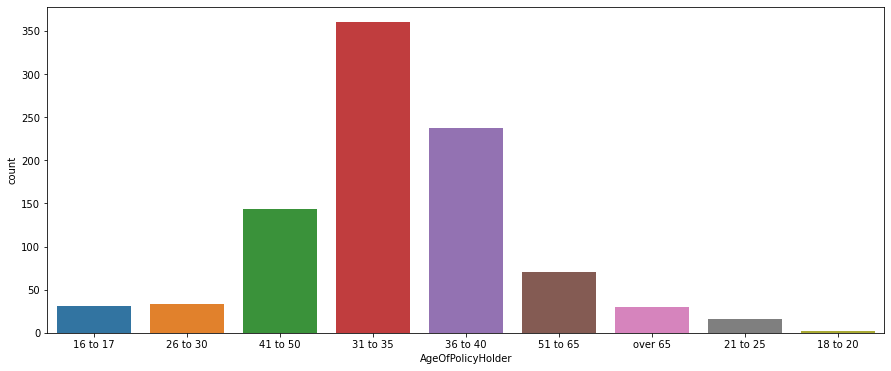

PoliceReportFiled: 


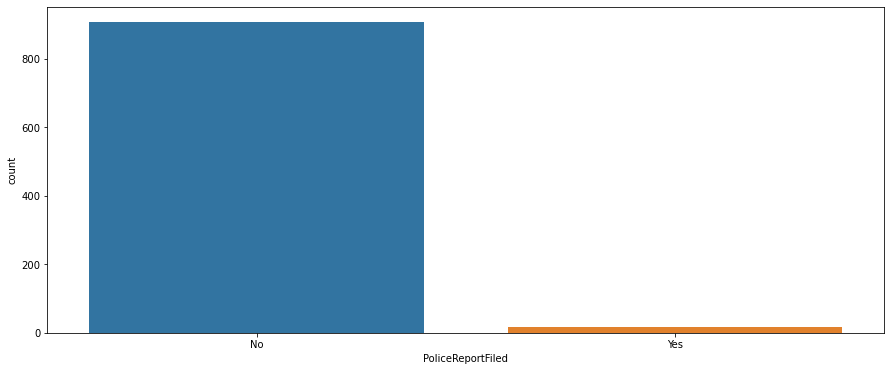

WitnessPresent: 


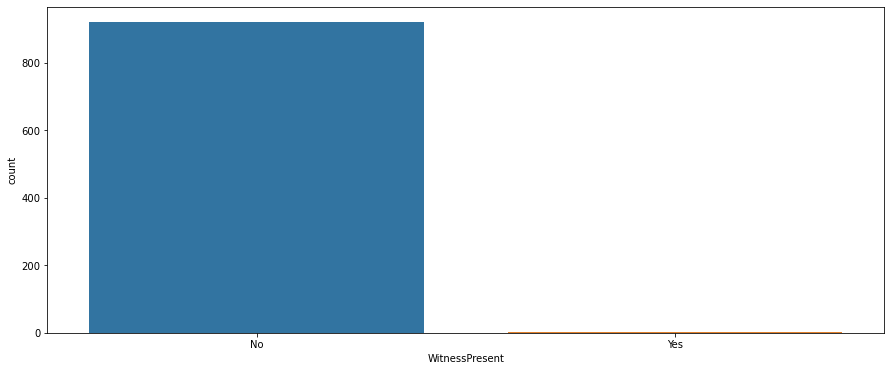

AgentType: 


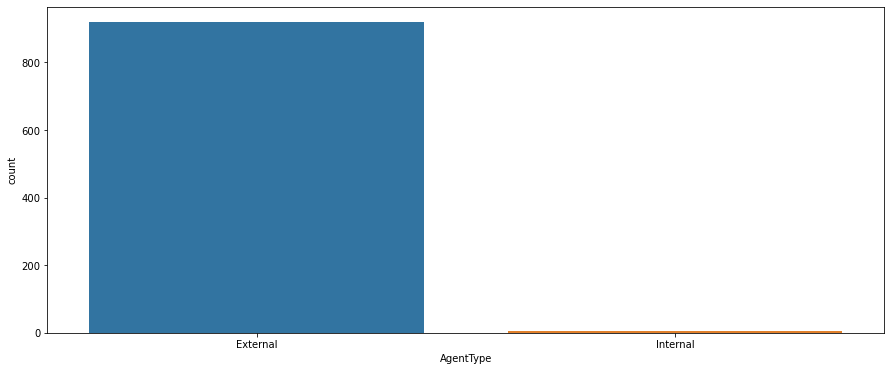

NumberOfSuppliments: 


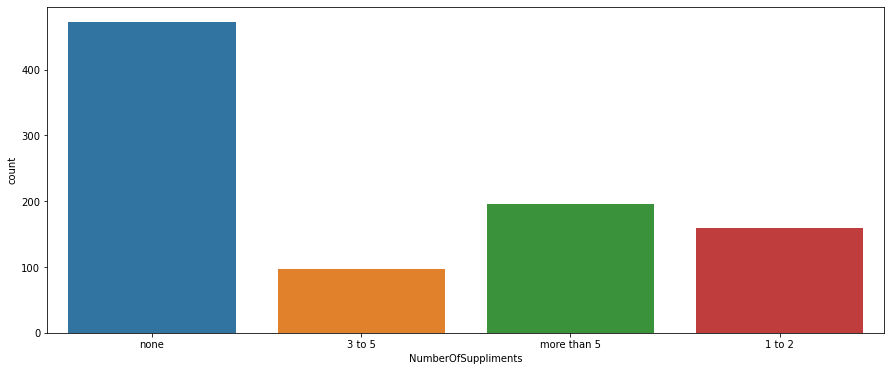

AddressChange_Claim: 


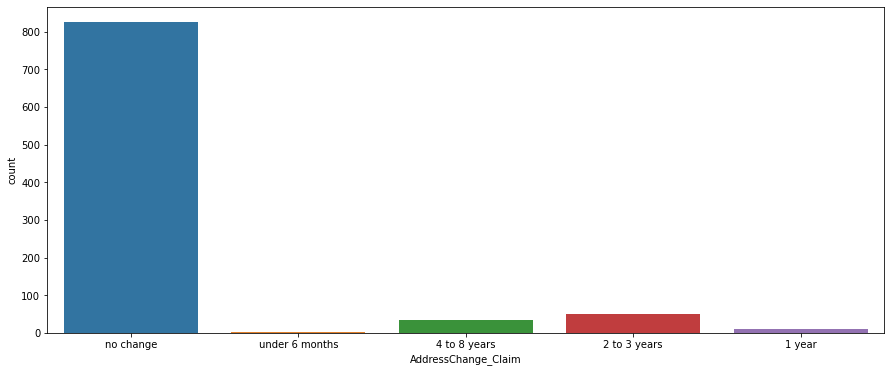

NumberOfCars: 


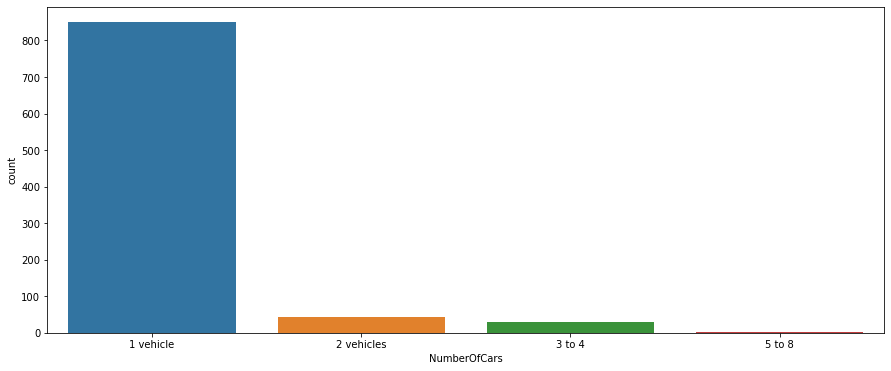

BasePolicy: 


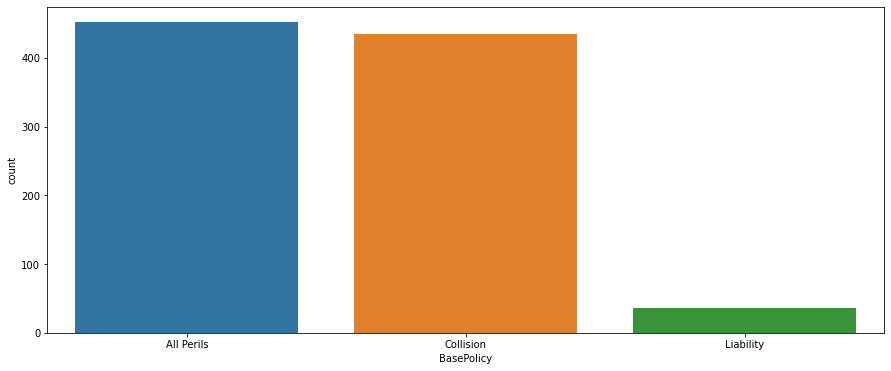

In [127]:
for c in categorical:
    plt.figure(figsize=(15,6))
    print(c + ": ")
    features = data[data.FraudFound_P == 1]
    sns.countplot(x = c, data = features)
    plt.show()

### Preprocessing 

In [128]:
numerical

Index(['WeekOfMonth', 'WeekOfMonthClaimed', 'Age', 'FraudFound_P',
       'PolicyNumber', 'RepNumber', 'Deductible', 'DriverRating', 'Year'],
      dtype='object')

In [129]:
data[numerical]

,WeekOfMonth,WeekOfMonthClaimed,Age,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Year
0,5,1,21,0,1,12,300,1,1994
1,3,4,34,0,2,15,400,4,1994
2,5,2,47,0,3,7,400,3,1994
3,2,1,65,0,4,4,400,2,1994
4,5,2,27,0,5,3,400,1,1994
...,...,...,...,...,...,...,...,...,...
15415,4,5,35,1,15416,5,400,4,1996
15416,5,1,30,0,15417,11,400,3,1996
15417,5,1,24,1,15418,4,400,4,1996
15418,1,2,34,0,15419,6,400,4,1996


In [130]:
data[numerical].describe()

,WeekOfMonth,WeekOfMonthClaimed,Age,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Year
count,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000
mean,2.788586,2.693969,39.855707,0.059857,7710.500000,8.483268,407.704280,2.487808,1994.866472
std,1.287585,1.259115,13.492377,0.237230,4451.514911,4.599948,43.950998,1.119453,0.803313
min,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,300.000000,1.000000,1994.000000
25%,2.000000,2.000000,31.000000,0.000000,3855.750000,5.000000,400.000000,1.000000,1994.000000
50%,3.000000,3.000000,38.000000,0.000000,7710.500000,8.000000,400.000000,2.000000,1995.000000
75%,4.000000,4.000000,48.000000,0.000000,11565.250000,12.000000,400.000000,3.000000,1996.000000
max,5.000000,5.000000,80.000000,1.000000,15420.000000,16.000000,700.000000,4.000000,1996.000000


In [131]:
data[data.Age==0][["FraudFound_P","Age"]].value_counts()

FraudFound_P  Age
0             0      289
1             0       31
dtype: int64

In [132]:
data[data.Age==0].index

Int64Index([    7,    13,    28,    31,    58,    62,    84,   119,   120,
              161,
            ...
            14749, 14802, 14891, 14938, 14967, 15243, 15262, 15274, 15379,
            15392],
           dtype='int64', length=320)

In [133]:
data.loc[data["Age"]==0,"Age"] = np.nan

In [134]:
data.isnull().sum()

Month                     0
WeekOfMonth               0
DayOfWeek                 0
Make                      0
AccidentArea              0
DayOfWeekClaimed          0
MonthClaimed              0
WeekOfMonthClaimed        0
Sex                       0
MaritalStatus             0
Age                     320
Fault                     0
PolicyType                0
VehicleCategory           0
VehiclePrice              0
FraudFound_P              0
PolicyNumber              0
RepNumber                 0
Deductible                0
DriverRating              0
Days_Policy_Accident      0
Days_Policy_Claim         0
PastNumberOfClaims        0
AgeOfVehicle              0
AgeOfPolicyHolder         0
PoliceReportFiled         0
WitnessPresent            0
AgentType                 0
NumberOfSuppliments       0
AddressChange_Claim       0
NumberOfCars              0
Year                      0
BasePolicy                0
dtype: int64

In [135]:
data.dropna(inplace=True)

In [136]:
data.isnull().sum()

Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
FraudFound_P            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            0
Days_Policy_Accident    0
Days_Policy_Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange_Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
dtype: int64

In [137]:
data[numerical]

,WeekOfMonth,WeekOfMonthClaimed,Age,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Year
0,5,1,21.0,0,1,12,300,1,1994
1,3,4,34.0,0,2,15,400,4,1994
2,5,2,47.0,0,3,7,400,3,1994
3,2,1,65.0,0,4,4,400,2,1994
4,5,2,27.0,0,5,3,400,1,1994
...,...,...,...,...,...,...,...,...,...
15415,4,5,35.0,1,15416,5,400,4,1996
15416,5,1,30.0,0,15417,11,400,3,1996
15417,5,1,24.0,1,15418,4,400,4,1996
15418,1,2,34.0,0,15419,6,400,4,1996


In [138]:
data["DriverRating"][data.FraudFound_P==1].value_counts()

3    235
4    225
1    224
2    208
Name: DriverRating, dtype: int64

In [139]:
data["Deductible"][data.FraudFound_P==1].value_counts()

400    825
500     47
700     18
300      2
Name: Deductible, dtype: int64

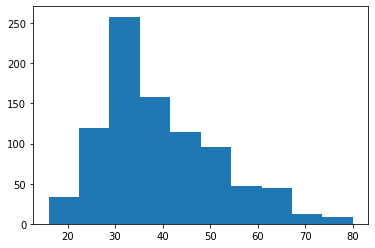

In [140]:
plt.hist(data[data.FraudFound_P==1]["Age"])
plt.show()

In [141]:
data.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


In [142]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [143]:
for c in categorical:
    encoder.fit(data[c])
    data[c] = encoder.transform(data[c])
    maping = dict(zip(encoder.classes_,encoder.transform(encoder.classes_)))
    print(c + ":",maping)

Month: {'Apr': 0, 'Aug': 1, 'Dec': 2, 'Feb': 3, 'Jan': 4, 'Jul': 5, 'Jun': 6, 'Mar': 7, 'May': 8, 'Nov': 9, 'Oct': 10, 'Sep': 11}
DayOfWeek: {'Friday': 0, 'Monday': 1, 'Saturday': 2, 'Sunday': 3, 'Thursday': 4, 'Tuesday': 5, 'Wednesday': 6}
Make: {'Accura': 0, 'BMW': 1, 'Chevrolet': 2, 'Dodge': 3, 'Ferrari': 4, 'Ford': 5, 'Honda': 6, 'Jaguar': 7, 'Lexus': 8, 'Mazda': 9, 'Mecedes': 10, 'Mercury': 11, 'Nisson': 12, 'Pontiac': 13, 'Porche': 14, 'Saab': 15, 'Saturn': 16, 'Toyota': 17, 'VW': 18}
AccidentArea: {'Rural': 0, 'Urban': 1}
DayOfWeekClaimed: {'Friday': 0, 'Monday': 1, 'Saturday': 2, 'Sunday': 3, 'Thursday': 4, 'Tuesday': 5, 'Wednesday': 6}
MonthClaimed: {'Apr': 0, 'Aug': 1, 'Dec': 2, 'Feb': 3, 'Jan': 4, 'Jul': 5, 'Jun': 6, 'Mar': 7, 'May': 8, 'Nov': 9, 'Oct': 10, 'Sep': 11}
Sex: {'Female': 0, 'Male': 1}
MaritalStatus: {'Divorced': 0, 'Married': 1, 'Single': 2, 'Widow': 3}
Fault: {'Policy Holder': 0, 'Third Party': 1}
PolicyType: {'Sedan - All Perils': 0, 'Sedan - Collision': 1, 'S

In [144]:
data

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,2,5,6,6,1,5,4,1,0,2,...,1,2,0,0,0,3,0,2,1994,2
1,4,3,6,6,1,1,4,4,1,2,...,4,3,1,0,0,3,3,0,1994,1
2,10,5,0,6,1,4,9,2,1,1,...,5,5,0,0,0,3,3,0,1994,1
3,6,2,2,17,0,0,5,1,1,1,...,6,6,1,0,0,2,3,0,1994,2
4,4,5,1,6,1,5,3,2,0,2,...,3,3,0,0,0,3,3,0,1994,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,9,4,0,17,1,5,9,5,1,1,...,4,3,0,0,0,3,3,0,1996,1
15416,9,5,4,13,1,0,2,1,1,1,...,4,3,0,0,0,2,3,2,1996,2
15417,9,5,4,17,0,0,2,1,1,2,...,3,2,0,0,0,0,3,0,1996,1
15418,2,1,1,17,1,4,2,2,0,1,...,0,3,0,0,0,2,3,0,1996,0


In [145]:
data.dtypes

Month                     int32
WeekOfMonth               int64
DayOfWeek                 int32
Make                      int32
AccidentArea              int32
DayOfWeekClaimed          int32
MonthClaimed              int32
WeekOfMonthClaimed        int64
Sex                       int32
MaritalStatus             int32
Age                     float64
Fault                     int32
PolicyType                int32
VehicleCategory           int32
VehiclePrice              int32
FraudFound_P              int64
PolicyNumber              int64
RepNumber                 int64
Deductible                int64
DriverRating              int64
Days_Policy_Accident      int32
Days_Policy_Claim         int32
PastNumberOfClaims        int32
AgeOfVehicle              int32
AgeOfPolicyHolder         int32
PoliceReportFiled         int32
WitnessPresent            int32
AgentType                 int32
NumberOfSuppliments       int32
AddressChange_Claim       int32
NumberOfCars              int32
Year    

In [146]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [150]:
from sklearn.model_selection import train_test_split
x = data.drop(["FraudFound_P","PolicyNumber"],axis=1)
x["Age"] = scaler.fit_transform(x[["Age"]])
y = data["FraudFound_P"]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=38)

In [151]:
x.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,2,5,6,6,1,5,4,1,0,2,...,1,2,0,0,0,3,0,2,1994,2
1,4,3,6,6,1,1,4,4,1,2,...,4,3,1,0,0,3,3,0,1994,1
2,10,5,0,6,1,4,9,2,1,1,...,5,5,0,0,0,3,3,0,1994,1
3,6,2,2,17,0,0,5,1,1,1,...,6,6,1,0,0,2,3,0,1994,2
4,4,5,1,6,1,5,3,2,0,2,...,3,3,0,0,0,3,3,0,1994,1


In [152]:
y

0        0
1        0
2        0
3        0
4        0
        ..
15415    1
15416    0
15417    1
15418    0
15419    1
Name: FraudFound_P, Length: 15100, dtype: int64

In [174]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(12080, 10) (12080,)
(3020, 10) (3020,)


#### feature selection

In [175]:
from sklearn.feature_selection import SelectKBest,chi2,f_classif
fs1 = SelectKBest(f_classif, k=10)
fs1.fit(x_train,y_train)

SelectKBest()

In [176]:
fs1.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [177]:
x_train = x_train[x_train.columns[fs1.get_support()]]
x_test = x_test[x_test.columns[fs1.get_support()]]

### Model Creation

In [178]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [179]:
model = RandomForestClassifier()
model.fit(x_train,y_train)
ans = model.predict(x_test)
score = accuracy_score(y_test,ans)
score*100

93.17880794701988

In [180]:
data["FraudFound_P"].value_counts()

0    14208
1      892
Name: FraudFound_P, dtype: int64

In [181]:
creport = classification_report(y_test, ans)
print(creport)

              precision    recall  f1-score   support

           0       0.94      0.99      0.96      2827
           1       0.35      0.08      0.13       193

    accuracy                           0.93      3020
   macro avg       0.64      0.53      0.55      3020
weighted avg       0.90      0.93      0.91      3020



In [182]:
matrix = confusion_matrix(y_test,ans)
matrix

array([[2799,   28],
       [ 178,   15]], dtype=int64)

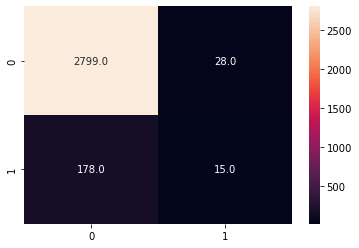

In [183]:
matrix = confusion_matrix(y_test, ans)
sns.heatmap(matrix, annot=True, fmt=".1f")
plt.show()

In [184]:
data.FraudFound_P.value_counts()/data.shape[0]*100

0    94.092715
1     5.907285
Name: FraudFound_P, dtype: float64

##### under sampling

In [187]:
yes = data[data.FraudFound_P==1]
no = data[data.FraudFound_P == 0]

In [188]:
print(yes.shape, no.shape)

(892, 33) (14208, 33)


In [189]:
no_new = no.sample(n=892)
no_new.shape

(892, 33)

In [193]:
df = pd.concat([yes,no_new],axis = 0)

In [194]:
df.shape

(1784, 33)

In [195]:
df.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'FraudFound_P', 'PolicyNumber', 'RepNumber',
       'Deductible', 'DriverRating', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year',
       'BasePolicy'],
      dtype='object')

In [203]:
x = df.drop(["FraudFound_P","PolicyNumber"], axis=1)
y = df.FraudFound_P
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=38)


In [204]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(1427, 31) (1427,)
(357, 31) (357,)


In [199]:
df.FraudFound_P.value_counts()

1    892
0    892
Name: FraudFound_P, dtype: int64

In [200]:
model = RandomForestClassifier()
model.fit(x_train,y_train)
ans = model.predict(x_test)
score = accuracy_score(y_test,ans)
score*100

79.55182072829132

In [201]:
matrix = confusion_matrix(y_test,ans)
matrix

array([[120,  63],
       [ 10, 164]], dtype=int64)

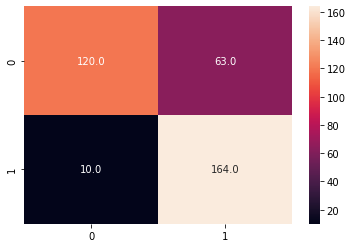

In [206]:
matrix = confusion_matrix(y_test, ans)
sns.heatmap(matrix, annot=True, fmt=".1f")
plt.show()